In [223]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [224]:
#load libs
import keras.models

import os, sys
from import_file import import_file
io = import_file("../utils/io.py")

In [225]:
# load data
base_dir = '/scratch/spigazzi/diphotonID/'

data = io.read_data(base_dir+'samples/diphoton_id_s+b_test.hd5', columns = None )

In [226]:
# list all model files in the training folder
target=base_dir+'AN_output_v4/pretrain'
models = !ls -lht $target/clf*.hdf5
print('\n'.join(models))
last_model = models[0].split()[-1]

-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:56 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-08.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:54 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-07.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:52 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-05.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:51 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-04.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:49 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-02.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:48 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-01.hdf5


In [227]:
# read training configuration
import json
with open('%s/../config.json' % target) as fin:
    config = json.loads(fin.read())
config

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/spigazzi/diphotonID/AN_output_v4/pretrain/../config.json'

In [228]:
features = ['leadptom',
            'subleadptom',
            'leadmva',
            'subleadmva',
            'leadeta',
            'subleadeta',
            'sigmarv',
            'sigmawv',
            'CosPhi',
            'vtxprob']


In [229]:
#features = config['options']['features'].split(',')
data['target'] = data['processIndex'] < 5

X = data[features].values
y = data['target'].values


In [230]:
model = keras.models.load_model(last_model,compile=False)

In [231]:
y_pred_NN = model.predict(X)

In [232]:
from sklearn.metrics import roc_auc_score, roc_curve

In [233]:
roc_NN = roc_curve(y, y_pred_NN,sample_weight=data['weight'])
roc_auc_score(y, y_pred_NN,sample_weight=data['weight'])

0.819012963082603

In [123]:
import _pickle as pickle

with open(base_dir+'roc_xgb_d10_e500.pkl', 'rb') as fin:
    roc_xgb_d10_e500 = pickle.load(fin, encoding='latin1')

with open(base_dir+'roc_legacy_pre-train.pkl', 'rb') as fin:
    roc_legacy = pickle.load(fin, encoding='latin1')


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/spigazzi/diphotonID/roc_xgb_d10_e500.pkl'

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


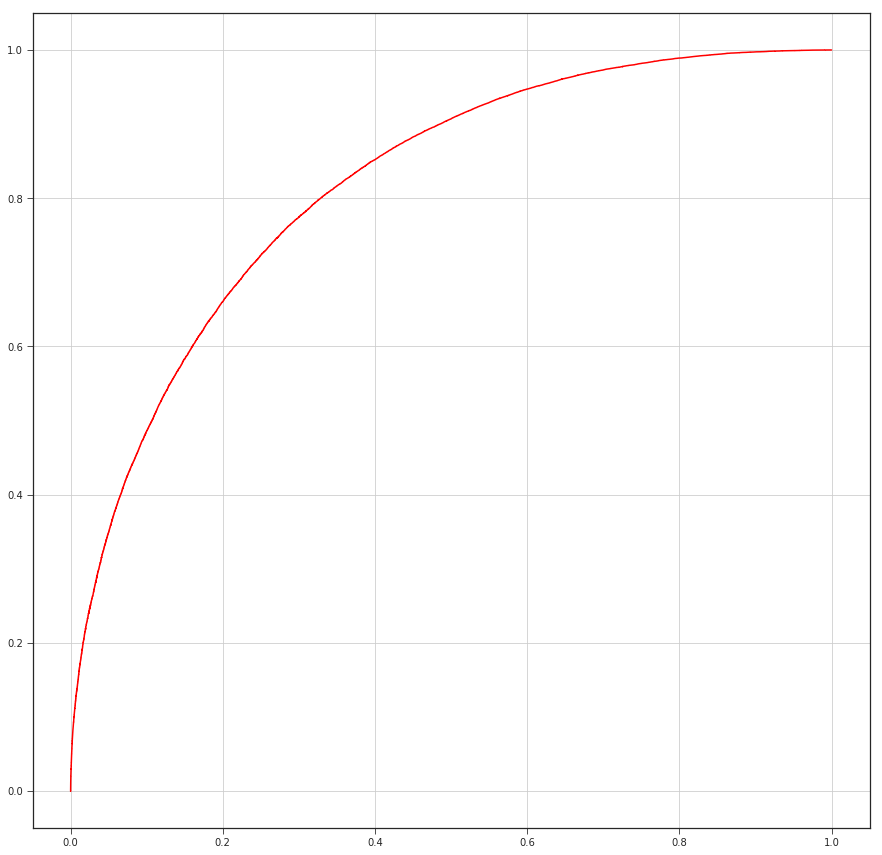

In [234]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = '15,15'
plt.plot(roc_NN[0], roc_NN[1], color='red')
#plt.plot(roc_xgb_d10_e500[0], roc_xgb_d10_e500[1], color='blue')
#plt.plot(roc_legacy[0], roc_legacy[1], color='black')
#plt.legend(['NN', 'XGB', 'Legacy'], fontsize='xx-large')
plt.grid()
plt.show()

In [235]:
import sys
sys.path.append('../')
from utils.pivot import Generator
import utils.io as io
import numpy as np

In [236]:
# load data
base_dir = '/scratch/spigazzi/diphotonID/'

data = io.read_data(base_dir+'samples/diphoton_id_s+b_test.hd5', columns = None )

features = ['leadptom',
            'subleadptom',
            'leadmva',
            'subleadmva',
            'leadeta',
            'subleadeta',
            'sigmarv',
            'sigmawv',
            'CosPhi',
            'vtxprob']



In [237]:
data['isSignal'] = (data['processIndex'] < 5).astype(np.float32)
data['isBkg'] = (data['processIndex'] >= 5).astype(np.float32)
X = data[features]
y = data['isSignal'].values.reshape(-1,1)
w = np.abs(data['weight'].values.ravel())


In [238]:
syst_shift={('leadmva','subleadmva'):[0, -0.1, 0.1]}
pgen = Generator(X,y,w,len(X.index),syst_shift=syst_shift)
X_orig_dsc,X_dsc,y_dsc,w_dsc = next(pgen())
which=(y_dsc[0] == 1).ravel()
X_orig_dsc = X_orig_dsc[which]
X_dsc = X_dsc[which]
y_dsc = [ yy[which] for yy in y_dsc ]
w_dsc = [ ww[which] for ww in w_dsc ]

/scratch/musella/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


(761457, 1) (761457, 3)
(761457, 10) (761457, 1) (761457, 4) (761457,)


In [239]:
import keras.models
# list all model files in the training folder
target=base_dir+'AN_output_v4/pretrain'
models = !ls -lht $target/clf*.hdf5
print('\n'.join(models))
last_clf_model = models[0].split()[-1]

models = !ls -lht $target/dsc*.hdf5
#print('\n'.join(models))
last_dsc_model = models[0].split()[-1]
print(last_clf_model, last_dsc_model)

-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:56 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-08.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:54 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-07.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:52 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-05.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:51 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-04.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:49 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-02.hdf5
-rw-r--r-- 1 spigazzi ethz-higgs 57M Dec 10 17:48 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-01.hdf5


/scratch/spigazzi/diphotonID/AN_output_v4/pretrain/clf-model-08.hdf5 /scratch/spigazzi/diphotonID/AN_output_v4/pretrain/dsc-model-99.hdf5


In [240]:
clf_model = keras.models.load_model(last_clf_model,compile=False)

In [241]:
import utils.losses as losses

dsc_model = keras.models.load_model(last_dsc_model,compile=True,custom_objects=losses.__dict__)

In [242]:
y_pred = clf_model.predict(X_dsc).reshape(-1, 1)

In [243]:
dsc_model.evaluate([y_pred, X_orig_dsc],y_dsc[1][:,np.newaxis,1:])

    32/105886 [..............................] - ETA: 1:09:58

   416/105886 [..............................] - ETA: 5:35   

   864/105886 [..............................] - ETA: 2:47

  1344/105886 [..............................] - ETA: 1:50

  1792/105886 [..............................] - ETA: 1:25

  2240/105886 [..............................] - ETA: 1:10

  2752/105886 [..............................] - ETA: 59s 

  3232/105886 [..............................] - ETA: 51s

  3712/105886 [>.............................] - ETA: 46s

  4256/105886 [>.............................] - ETA: 41s

  4704/105886 [>.............................] - ETA: 38s

  5120/105886 [>.............................] - ETA: 36s

  5504/105886 [>.............................] - ETA: 34s

  5888/105886 [>.............................] - ETA: 32s

  6272/105886 [>.............................] - ETA: 31s

  6656/105886 [>.............................] - ETA: 30s

  7040/105886 [>.............................] - ETA: 29s

  7456/105886 [=>............................] - ETA: 28s

  7872/105886 [=>............................] - ETA: 27s

  8224/105886 [=>............................] - ETA: 26s

  8480/105886 [=>............................] - ETA: 26s

  8800/105886 [=>............................] - ETA: 25s

  9152/105886 [=>............................] - ETA: 25s

  9504/105886 [=>............................] - ETA: 24s

  9920/105886 [=>............................] - ETA: 24s

 10272/105886 [=>............................] - ETA: 23s

 10560/105886 [=>............................] - ETA: 23s

 10912/105886 [==>...........................] - ETA: 23s

 11232/105886 [==>...........................] - ETA: 22s

 11616/105886 [==>...........................] - ETA: 22s

 12000/105886 [==>...........................] - ETA: 22s

 12416/105886 [==>...........................] - ETA: 21s

 12832/105886 [==>...........................] - ETA: 21s

 13248/105886 [==>...........................] - ETA: 20s

 13600/105886 [==>...........................] - ETA: 20s

 13920/105886 [==>...........................] - ETA: 20s

 14272/105886 [===>..........................] - ETA: 20s

 14656/105886 [===>..........................] - ETA: 19s

 15040/105886 [===>..........................] - ETA: 19s

 15424/105886 [===>..........................] - ETA: 19s

 15808/105886 [===>..........................] - ETA: 19s

 16160/105886 [===>..........................] - ETA: 18s

 16512/105886 [===>..........................] - ETA: 18s

 16896/105886 [===>..........................] - ETA: 18s

 17248/105886 [===>..........................] - ETA: 18s

 17632/105886 [===>..........................] - ETA: 18s

 18016/105886 [====>.........................] - ETA: 17s

 18368/105886 [====>.........................] - ETA: 17s

 18752/105886 [====>.........................] - ETA: 17s

 19136/105886 [====>.........................] - ETA: 17s

 19424/105886 [====>.........................] - ETA: 17s

 19744/105886 [====>.........................] - ETA: 17s

 20096/105886 [====>.........................] - ETA: 16s

 20448/105886 [====>.........................] - ETA: 16s

 20832/105886 [====>.........................] - ETA: 16s

 21184/105886 [=====>........................] - ETA: 16s

 21536/105886 [=====>........................] - ETA: 16s

 21888/105886 [=====>........................] - ETA: 16s

 22272/105886 [=====>........................] - ETA: 16s

 22656/105886 [=====>........................] - ETA: 15s

 23008/105886 [=====>........................] - ETA: 15s

 23360/105886 [=====>........................] - ETA: 15s

 23744/105886 [=====>........................] - ETA: 15s

 24064/105886 [=====>........................] - ETA: 15s

 24384/105886 [=====>........................] - ETA: 15s

 24704/105886 [=====>........................] - ETA: 15s

 25056/105886 [======>.......................] - ETA: 15s

 25408/105886 [======>.......................] - ETA: 15s

 25760/105886 [======>.......................] - ETA: 14s

 26112/105886 [======>.......................] - ETA: 14s

 26464/105886 [======>.......................] - ETA: 14s

 26848/105886 [======>.......................] - ETA: 14s

 27232/105886 [======>.......................] - ETA: 14s

 27648/105886 [======>.......................] - ETA: 14s

 28064/105886 [======>.......................] - ETA: 14s

 28512/105886 [=======>......................] - ETA: 14s

 28960/105886 [=======>......................] - ETA: 13s

 29376/105886 [=======>......................] - ETA: 13s

 29792/105886 [=======>......................] - ETA: 13s

 30208/105886 [=======>......................] - ETA: 13s

 30560/105886 [=======>......................] - ETA: 13s

 30912/105886 [=======>......................] - ETA: 13s

 31296/105886 [=======>......................] - ETA: 13s

 31648/105886 [=======>......................] - ETA: 13s

 32032/105886 [========>.....................] - ETA: 13s

 32448/105886 [========>.....................] - ETA: 12s

 32832/105886 [========>.....................] - ETA: 12s

 33184/105886 [========>.....................] - ETA: 12s

 33568/105886 [========>.....................] - ETA: 12s

 33952/105886 [========>.....................] - ETA: 12s

 34336/105886 [========>.....................] - ETA: 12s

 34720/105886 [========>.....................] - ETA: 12s

 35072/105886 [========>.....................] - ETA: 12s

 35488/105886 [=========>....................] - ETA: 12s

 35872/105886 [=========>....................] - ETA: 12s

 36256/105886 [=========>....................] - ETA: 11s

 36640/105886 [=========>....................] - ETA: 11s

 37056/105886 [=========>....................] - ETA: 11s

 37440/105886 [=========>....................] - ETA: 11s

 37824/105886 [=========>....................] - ETA: 11s

 38208/105886 [=========>....................] - ETA: 11s

 38592/105886 [=========>....................] - ETA: 11s

 38976/105886 [==========>...................] - ETA: 11s

 39360/105886 [==========>...................] - ETA: 11s

 39744/105886 [==========>...................] - ETA: 11s

 40096/105886 [==========>...................] - ETA: 11s

 40448/105886 [==========>...................] - ETA: 10s

 40832/105886 [==========>...................] - ETA: 10s

 41248/105886 [==========>...................] - ETA: 10s

 41632/105886 [==========>...................] - ETA: 10s

 42048/105886 [==========>...................] - ETA: 10s

 42368/105886 [===========>..................] - ETA: 10s

 42752/105886 [===========>..................] - ETA: 10s

 43104/105886 [===========>..................] - ETA: 10s

 43488/105886 [===========>..................] - ETA: 10s

 43872/105886 [===========>..................] - ETA: 10s

 44256/105886 [===========>..................] - ETA: 10s

 44736/105886 [===========>..................] - ETA: 10s

 45216/105886 [===========>..................] - ETA: 9s 

 45664/105886 [===========>..................] - ETA: 9s

 46080/105886 [============>.................] - ETA: 9s

 46560/105886 [============>.................] - ETA: 9s

 47008/105886 [============>.................] - ETA: 9s

 47456/105886 [============>.................] - ETA: 9s

 47904/105886 [============>.................] - ETA: 9s

 48352/105886 [============>.................] - ETA: 9s

 48768/105886 [============>.................] - ETA: 9s

 49184/105886 [============>.................] - ETA: 9s

 49600/105886 [=============>................] - ETA: 8s

 50016/105886 [=============>................] - ETA: 8s

 50432/105886 [=============>................] - ETA: 8s

 50848/105886 [=============>................] - ETA: 8s

 51232/105886 [=============>................] - ETA: 8s

 51648/105886 [=============>................] - ETA: 8s

 52064/105886 [=============>................] - ETA: 8s

 52480/105886 [=============>................] - ETA: 8s

 52896/105886 [=============>................] - ETA: 8s

 53312/105886 [==============>...............] - ETA: 8s

 53728/105886 [==============>...............] - ETA: 8s

 54112/105886 [==============>...............] - ETA: 8s

 54560/105886 [==============>...............] - ETA: 8s

 55040/105886 [==============>...............] - ETA: 7s

 55520/105886 [==============>...............] - ETA: 7s

 56000/105886 [==============>...............] - ETA: 7s

 56480/105886 [===============>..............] - ETA: 7s

 56992/105886 [===============>..............] - ETA: 7s

 57536/105886 [===============>..............] - ETA: 7s

 57952/105886 [===============>..............] - ETA: 7s

 58496/105886 [===============>..............] - ETA: 7s

 59008/105886 [===============>..............] - ETA: 7s

 59488/105886 [===============>..............] - ETA: 7s

 59936/105886 [===============>..............] - ETA: 6s

 60448/105886 [================>.............] - ETA: 6s

 60864/105886 [================>.............] - ETA: 6s

 61376/105886 [================>.............] - ETA: 6s

 61824/105886 [================>.............] - ETA: 6s

 62368/105886 [================>.............] - ETA: 6s

 62912/105886 [================>.............] - ETA: 6s

 63456/105886 [================>.............] - ETA: 6s

 64000/105886 [=================>............] - ETA: 6s

 64512/105886 [=================>............] - ETA: 6s

 65056/105886 [=================>............] - ETA: 6s

 65632/105886 [=================>............] - ETA: 5s

 66176/105886 [=================>............] - ETA: 5s

 66720/105886 [=================>............] - ETA: 5s

 67232/105886 [==================>...........] - ETA: 5s

 67808/105886 [==================>...........] - ETA: 5s

 68384/105886 [==================>...........] - ETA: 5s

 68928/105886 [==================>...........] - ETA: 5s

 69440/105886 [==================>...........] - ETA: 5s

 70016/105886 [==================>...........] - ETA: 5s

 70560/105886 [==================>...........] - ETA: 5s

 71072/105886 [===================>..........] - ETA: 4s

 71584/105886 [===================>..........] - ETA: 4s

 72096/105886 [===================>..........] - ETA: 4s

 72672/105886 [===================>..........] - ETA: 4s

 73216/105886 [===================>..........] - ETA: 4s

 73760/105886 [===================>..........] - ETA: 4s

 74336/105886 [====================>.........] - ETA: 4s

 74912/105886 [====================>.........] - ETA: 4s

 75424/105886 [====================>.........] - ETA: 4s

 75968/105886 [====================>.........] - ETA: 4s

 76544/105886 [====================>.........] - ETA: 4s

 77056/105886 [====================>.........] - ETA: 4s

 77568/105886 [====================>.........] - ETA: 3s

 78016/105886 [=====================>........] - ETA: 3s

 78496/105886 [=====================>........] - ETA: 3s

 78944/105886 [=====================>........] - ETA: 3s

 79392/105886 [=====================>........] - ETA: 3s

 79776/105886 [=====================>........] - ETA: 3s

 80288/105886 [=====================>........] - ETA: 3s

 80800/105886 [=====================>........] - ETA: 3s

 81344/105886 [======================>.......] - ETA: 3s

 81856/105886 [======================>.......] - ETA: 3s

 82400/105886 [======================>.......] - ETA: 3s

 82912/105886 [======================>.......] - ETA: 3s

 83456/105886 [======================>.......] - ETA: 3s

 83936/105886 [======================>.......] - ETA: 3s

 84480/105886 [======================>.......] - ETA: 2s

 85024/105886 [=======================>......] - ETA: 2s

 85504/105886 [=======================>......] - ETA: 2s

 85984/105886 [=======================>......] - ETA: 2s

 86464/105886 [=======================>......] - ETA: 2s

 86944/105886 [=======================>......] - ETA: 2s

 87456/105886 [=======================>......] - ETA: 2s

 87968/105886 [=======================>......] - ETA: 2s

 88544/105886 [========================>.....] - ETA: 2s

 89024/105886 [========================>.....] - ETA: 2s

 89568/105886 [========================>.....] - ETA: 2s

 90080/105886 [========================>.....] - ETA: 2s

 90560/105886 [========================>.....] - ETA: 2s

 91040/105886 [========================>.....] - ETA: 1s

 91552/105886 [========================>.....] - ETA: 1s

 92064/105886 [=========================>....] - ETA: 1s

 92320/105886 [=========================>....] - ETA: 1s

 92736/105886 [=========================>....] - ETA: 1s

 93248/105886 [=========================>....] - ETA: 1s

 93792/105886 [=========================>....] - ETA: 1s

 94304/105886 [=========================>....] - ETA: 1s

 94816/105886 [=========================>....] - ETA: 1s

 95328/105886 [==========================>...] - ETA: 1s

 95872/105886 [==========================>...] - ETA: 1s

 96384/105886 [==========================>...] - ETA: 1s

 96864/105886 [==========================>...] - ETA: 1s

 97376/105886 [==========================>...] - ETA: 1s

 97888/105886 [==========================>...] - ETA: 1s

 98400/105886 [==========================>...] - ETA: 0s

 98880/105886 [===========================>..] - ETA: 0s

 99328/105886 [===========================>..] - ETA: 0s

 99808/105886 [===========================>..] - ETA: 0s

100320/105886 [===========================>..] - ETA: 0s

100800/105886 [===========================>..] - ETA: 0s

101280/105886 [===========================>..] - ETA: 0s

101760/105886 [===========================>..] - ETA: 0s

102272/105886 [===========================>..] - ETA: 0s

102688/105886 [============================>.] - ETA: 0s

103104/105886 [============================>.] - ETA: 0s

103584/105886 [============================>.] - ETA: 0s

104064/105886 [============================>.] - ETA: 0s

104544/105886 [============================>.] - ETA: 0s

105024/105886 [============================>.] - ETA: 0s

105536/105886 [============================>.] - ETA: 0s

105886/105886 [==============================] - 14s 131us/step


[0.5038230663125589,
 0.09901590583955706,
 0.19765281562918388,
 0.5544284086301451]

In [244]:
y_pred_dsc = dsc_model.predict([y_pred, X_orig_dsc]).reshape(-1,3)

In [245]:
from sklearn.metrics import confusion_matrix

In [246]:
y_dsc_labels = y_dsc[1][:,1:].argmax(axis=1)
y_pred_dsc_labels = y_pred_dsc.argmax(axis=1)


In [247]:
cnf = confusion_matrix(y_dsc_labels,y_pred_dsc_labels,sample_weight=w_dsc[0]).astype(np.float32)

In [248]:
import itertools
import matplotlib.pyplot as plt

def show_matrix(mtx):
    mig = (mtx / np.sum(mtx,axis=1,keepdims=True)).T * 100.
    print(  (100. - np.diag(mig)).mean() )
    plt.matshow(mig,cmap=plt.cm.Blues,vmin=0,vmax=100)
    thresh = 0.3
    for i, j in itertools.product(range(mtx.shape[0]), range(mtx.shape[1])):
        plt.text(j, i, format(mig[i, j], '.0f'),
                 horizontalalignment="center")
                 #color="white" if mtx[i, j] > thresh else "black")
    plt.ylabel('pred')
    plt.xlabel('true')
    plt.title('Migration matrix')
    plt.colorbar()
    plt.show()

    pur = (mtx / np.sum(mtx,axis=0,keepdims=True)).T * 100.
    plt.matshow( pur,cmap=plt.cm.Reds,vmin=0,vmax=100)
    for i, j in itertools.product(range(mtx.shape[0]), range(mtx.shape[1])):
        plt.text(j, i, format(pur[i, j], '.0f'),
                 horizontalalignment="center")

#     diag = np.diag(pur)*np.identity(pur.shape[0])
#     offdiag = pur - diag 
    print(  (100. - np.diag(pur)).min(), (100. - np.diag(pur)).mean(),(100. - np.diag(pur)).max() )
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.title('Purity matrix')
    plt.colorbar()
    plt.show()

16.719687


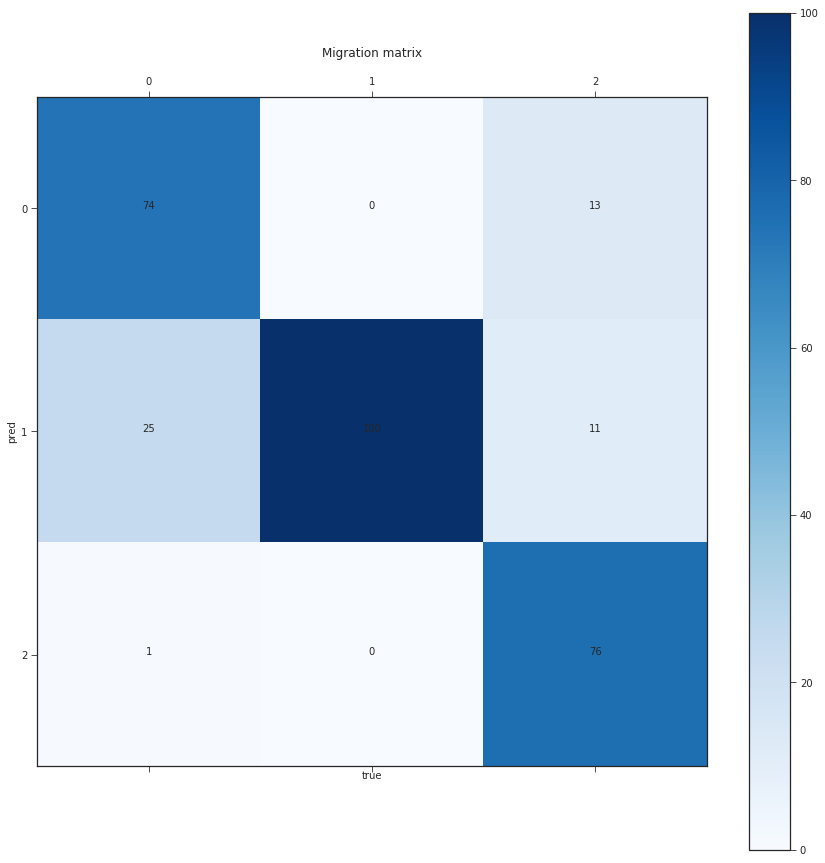

0.847229 14.077881 26.653809


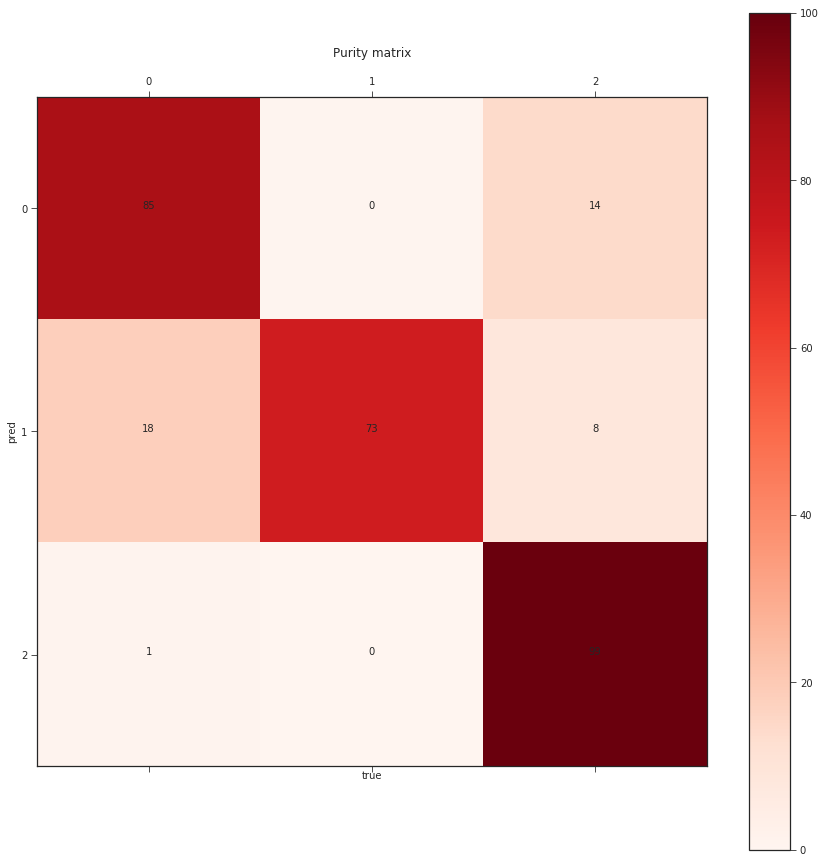

In [249]:
show_matrix(cnf)

In [250]:
cnf

array([[5398672.   , 1829788.8  ,   46968.95 ],
       [  26094.371, 7318965.5  ,       0.   ],
       [ 906694.5  ,  829904.4  , 5496835.   ]], dtype=float32)

In [251]:
np.vstack([ y_dsc_labels,y_pred_dsc_labels ] )[:10]

array([[2, 0, 1, ..., 1, 2, 1],
       [2, 1, 1, ..., 1, 2, 1]])

In [252]:
y_pred_dsc_labels.min()

0

In [253]:
y_dsc_labels[:10]

array([2, 0, 1, 0, 0, 1, 2, 0, 0, 1])

In [254]:
((y_pred_dsc[:,0] > y_pred_dsc[:,1]) & ((y_pred_dsc[:,0] > y_pred_dsc[:,2]))).sum()

29390

In [255]:
y_pred_dsc.std(axis=0)

array([0.32244545, 0.3606604 , 0.36960834], dtype=float32)

In [256]:
# background
#pgen = Generator(X,y,w,len(X.index),syst_shift=syst_shift)
X_orig_bkg,X_bkg,y_bkg,w_bkg = next(pgen())
which=(y_bkg[0] == 0).ravel()
X_orig_bkg = X_orig_bkg[which]
X_bkg = X_bkg[which]
y_bkg = [ yy[which] for yy in y_bkg ]
w_bkg = [ ww[which] for ww in w_bkg ]

y_bkg = clf_model.predict(X_bkg).reshape(-1, 1)

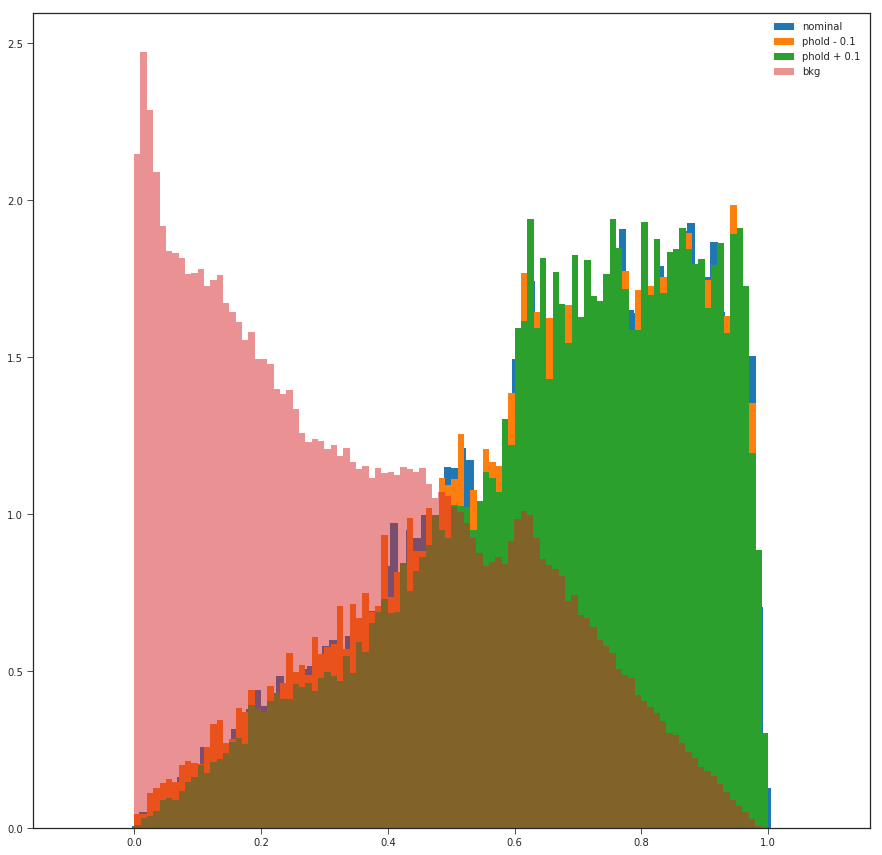

In [257]:
nominal=(y_dsc[1][:,1] == 1).ravel()
deltam=(y_dsc[1][:,2] == 1).ravel()
deltap=(y_dsc[1][:,3] == 1).ravel()
plt.hist(y_pred[nominal], weights=w_dsc[0][nominal], bins=100, range=[-0.1,1.1], density=True, label='nominal')
plt.hist(y_pred[deltam], weights=w_dsc[0][deltam],  bins=100, density=True, label='phoId - 0.1')
plt.hist(y_pred[deltap], weights=w_dsc[0][deltap],  bins=100, density=True, label='phoId + 0.1')
plt.hist(y_bkg, weights=w_bkg[0], bins=100, label='bkg', density=True, alpha=0.5)
plt.legend()
plt.show()